# Wine Classification

Myisha Chaudhry- 200591740

Kayleigh Habib - 200370580

Abigail Lee - 200469770


### Introduction

In [119]:
install.packages("corrplot")
install.packages("kernlab")
library(dplyr)
library(ggplot2)
library(corrplot)
library(tidyverse)
library(GGally)
library(caret) 
library(class)
library(randomForest)
library(tree)
library(kernlab)      
library(e1071)  
library(pROC)
library(factoextra)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




### Load and Describe Data

The data used was retrieved from the University of California, Irvine (UCI) Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality) and represents data that was collected by the Institute of Radiology of the University Erlangen-Nuremberg, Germany.

In [2]:
# Load the data
red <- read.csv("winequality-red.csv", sep = ";")
white <- read.csv("winequality-white.csv", sep = ";")

In [3]:
red$type <- as.factor("red")
#head(red)
white$type<- as.factor("white")
#head(white)

In [4]:
data <- rbind(red, white)%>% 
  select(quality, everything()) #set quality in first column
data

quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,type
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,red
5,7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,red
5,7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,red
6,11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,red
5,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,red
5,7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,red
5,7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,red
7,7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,red
7,7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,red


In [5]:
# Look at the makeup of the data
str(data)
#6497 rows of 13 variables and 1 target (quality)

'data.frame':	6497 obs. of  13 variables:
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ type                : Factor w/ 2 levels "red","white": 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
# get current column names
colnames(data)
#rename columns
names(data) <- c('quality','fixAcid','volAcid','citAcid','resSugar','chlor','freeSO2','totSO2','density','pH','sulphate','alcohol','type')
#check new column names and for any missing values
summary(data)
#No NA

[1] "quality"              "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "type"

    quality         fixAcid          volAcid          citAcid      
 Min.   :3.000   Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 1st Qu.:5.000   1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500  
 Median :6.000   Median : 7.000   Median :0.2900   Median :0.3100  
 Mean   :5.818   Mean   : 7.215   Mean   :0.3397   Mean   :0.3186  
 3rd Qu.:6.000   3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900  
 Max.   :9.000   Max.   :15.900   Max.   :1.5800   Max.   :1.6600  
    resSugar          chlor            freeSO2           totSO2     
 Min.   : 0.600   Min.   :0.00900   Min.   :  1.00   Min.   :  6.0  
 1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00   1st Qu.: 77.0  
 Median : 3.000   Median :0.04700   Median : 29.00   Median :118.0  
 Mean   : 5.443   Mean   :0.05603   Mean   : 30.53   Mean   :115.7  
 3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41.00   3rd Qu.:156.0  
 Max.   :65.800   Max.   :0.61100   Max.   :289.00   Max.   :440.0  
    density             pH           sulp

### Data manipulation

In [7]:
# make dummy variable (0 = red, 1 = white)

# group the quality of data into 3 groups
# high, medium and low
data %>% group_by(quality)%>%summarise(count = n())

wine_data<- data %>%
    mutate(type = ifelse(type == "red", 1,0),
          quality = case_when(quality >= 6 ~ "high",
                              TRUE ~ "low"),
          quality = factor(quality, levels = c("low", "high")))
  
head(wine_data)
levels(wine_data$quality)

quality,count
<int>,<int>
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


,quality,fixAcid,volAcid,citAcid,resSugar,chlor,freeSO2,totSO2,density,pH,sulphate,alcohol,type
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,low,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
2,low,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1
3,low,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1
4,high,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
5,low,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
6,low,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1


[1] "low"  "high"

### Exploratory Data Analysis

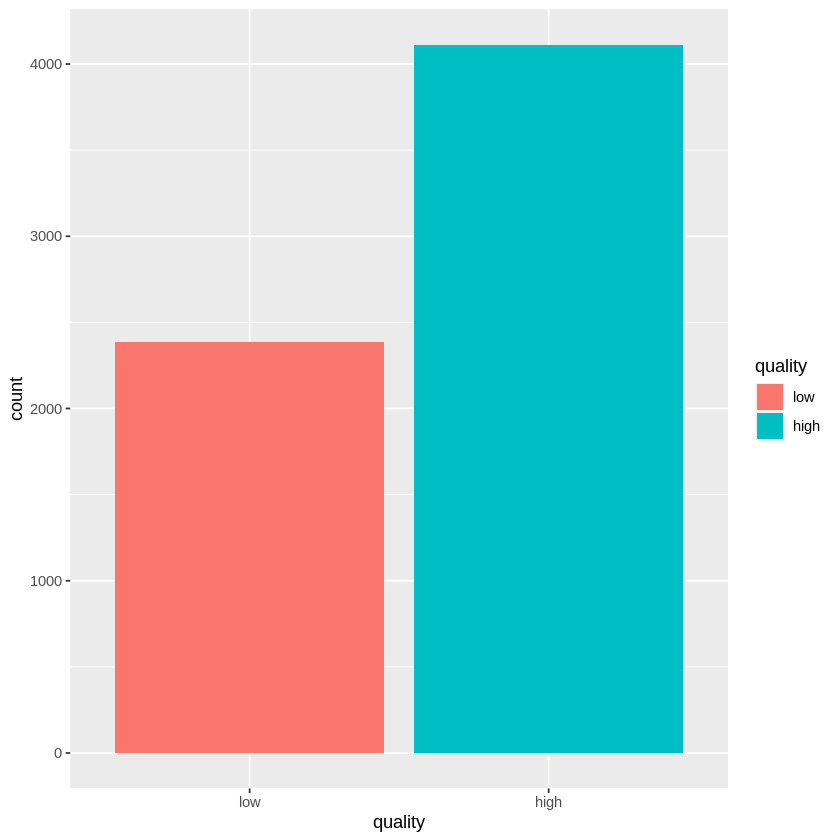

In [8]:
#distribution of target variable
wine_data %>% ggplot(aes(x=quality, fill=quality))+
  geom_bar(aes(y = after_stat(count)))

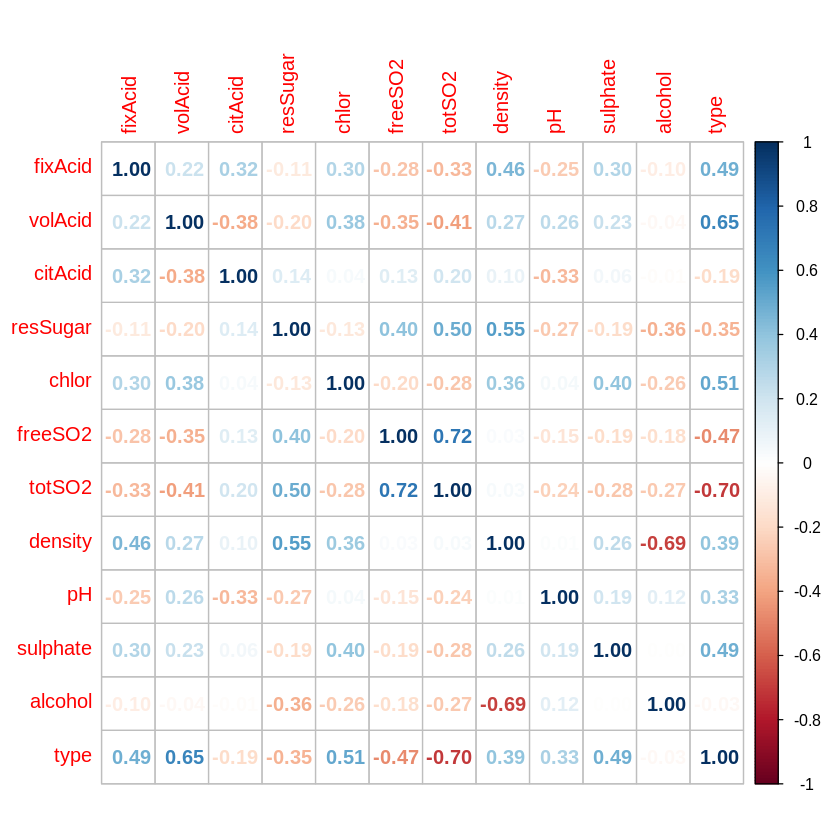

In [9]:
#Check correlation
n <- cor(wine_data %>% select(-quality),use = "complete.obs")
corrplot(n, method = "number")

In [10]:
#remove freeSO2 since correlated with totSO2
wine_data <- wine_data %>% 
  select(-freeSO2)

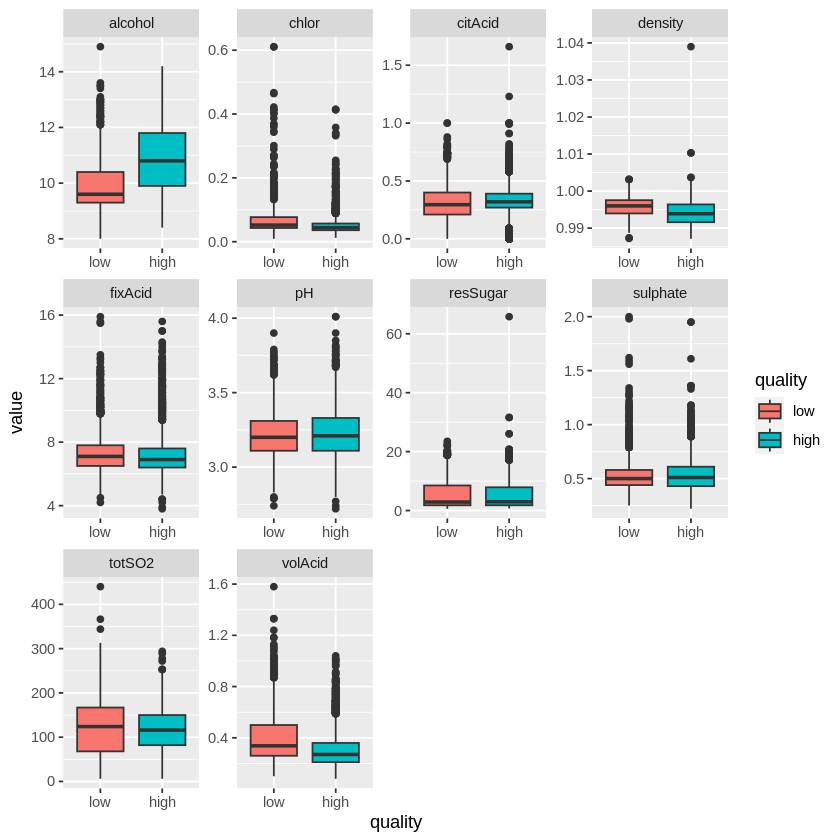

In [11]:
df_long <- wine_data %>% 
  pivot_longer(cols = fixAcid:alcohol, names_to = 'variable', values_to = 'value')

g <- ggplot(data = df_long, aes(x = quality, y = value, fill= quality)) +
  geom_boxplot() +
  facet_wrap(facets = ~variable, scales = 'free')
print(g)

In [12]:
# #remove pH, resSugar since not materially related to quality
# wine_data <- wine_data %>% 
#   select(-pH, - resSugar)

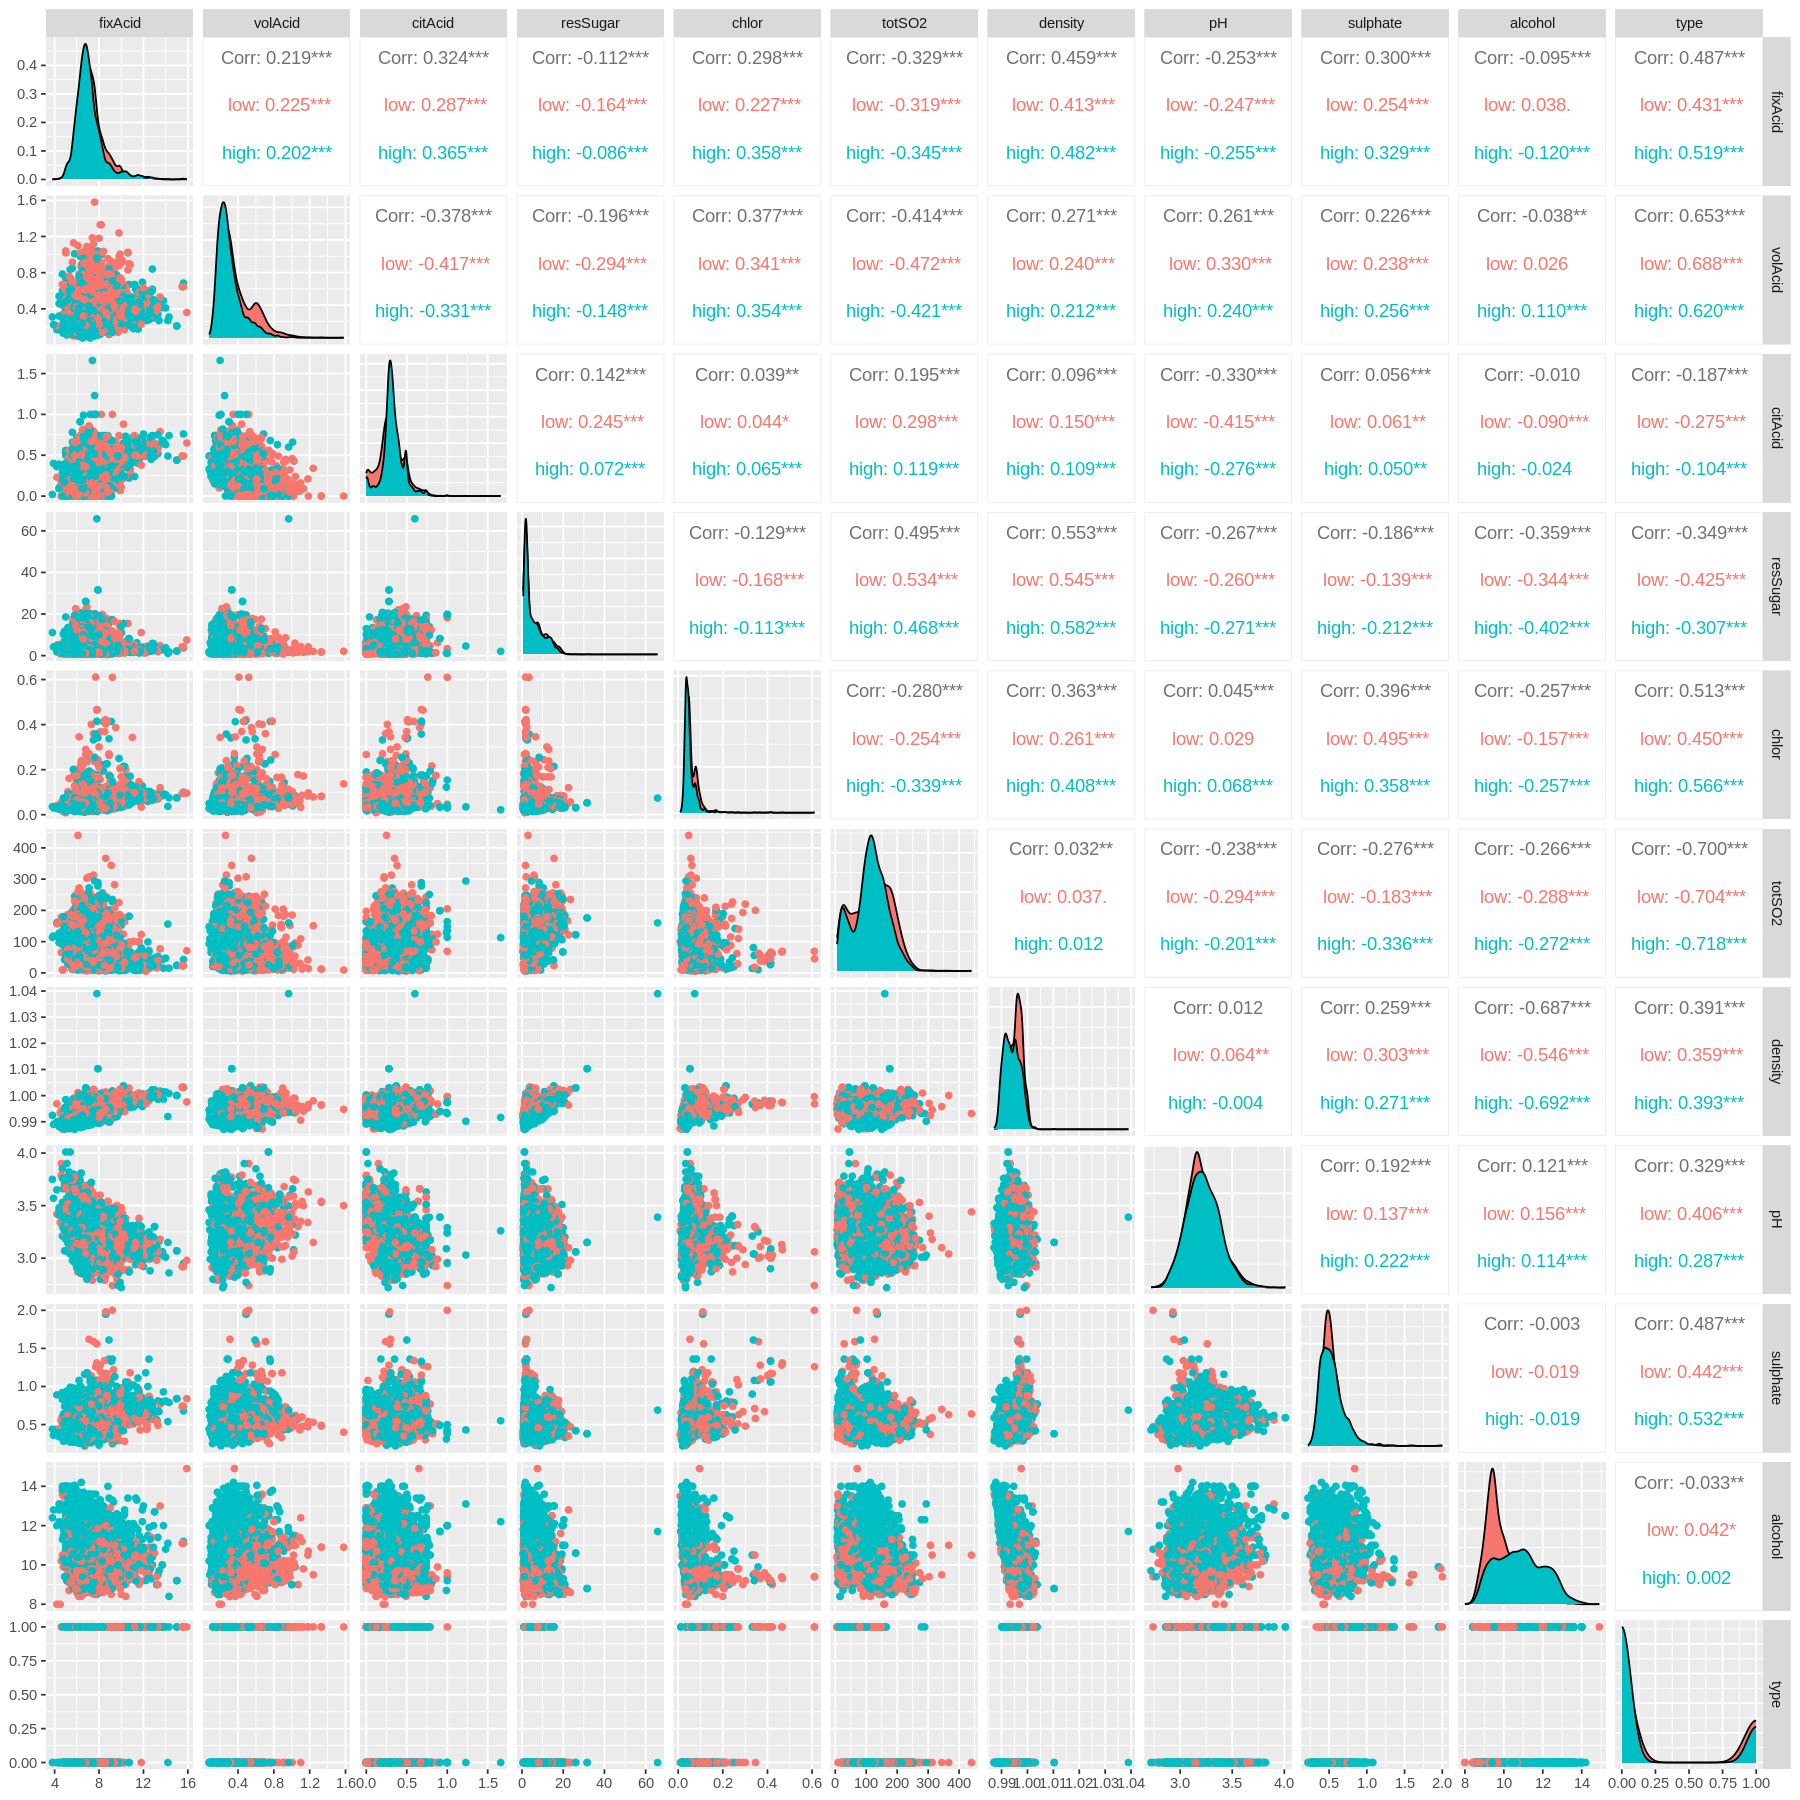

In [12]:
options(repr.plot.width=15, repr.plot.height=15)
ggpairs(data = wine_data, 
        columns = 2:ncol(wine_data), 
        mapping = aes(color = quality))

In [13]:
# scale the data
wine_data_scaled <-  wine_data %>%
  mutate(across(where(is.numeric), scale))

In [14]:
# PCA
wine_pca <- model.matrix(quality ~ ., data = wine_data_scaled)[,-1]
pca_total <- princomp(wine_pca)
# pca_total$loadings
# To get the loadings (see how much each comp is made up of variables) 
# and the scores (converts each component into value)unclass(pca_total$loadings)
scores <- pca_total$scores 
summary(pca_total)
#Can probably use first 8 principal components which explain >95% of variation
# OR could use first 7 prinicipal components which explain >90% of variation

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8565995 1.5659555 1.2372084 0.94482866 0.84450929
Proportion of Variance 0.3134084 0.2229631 0.1391746 0.08116715 0.06484598
Cumulative Proportion  0.3134084 0.5363715 0.6755461 0.75671321 0.82155919
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.75700028 0.71305368 0.65532909 0.53592453 0.37383323
Proportion of Variance 0.05210342 0.04622944 0.03904748 0.02611448 0.01270662
Cumulative Proportion  0.87366261 0.91989205 0.95893953 0.98505402 0.99776063
                           Comp.11
Standard deviation     0.156937069
Proportion of Variance 0.002239367
Cumulative Proportion  1.000000000

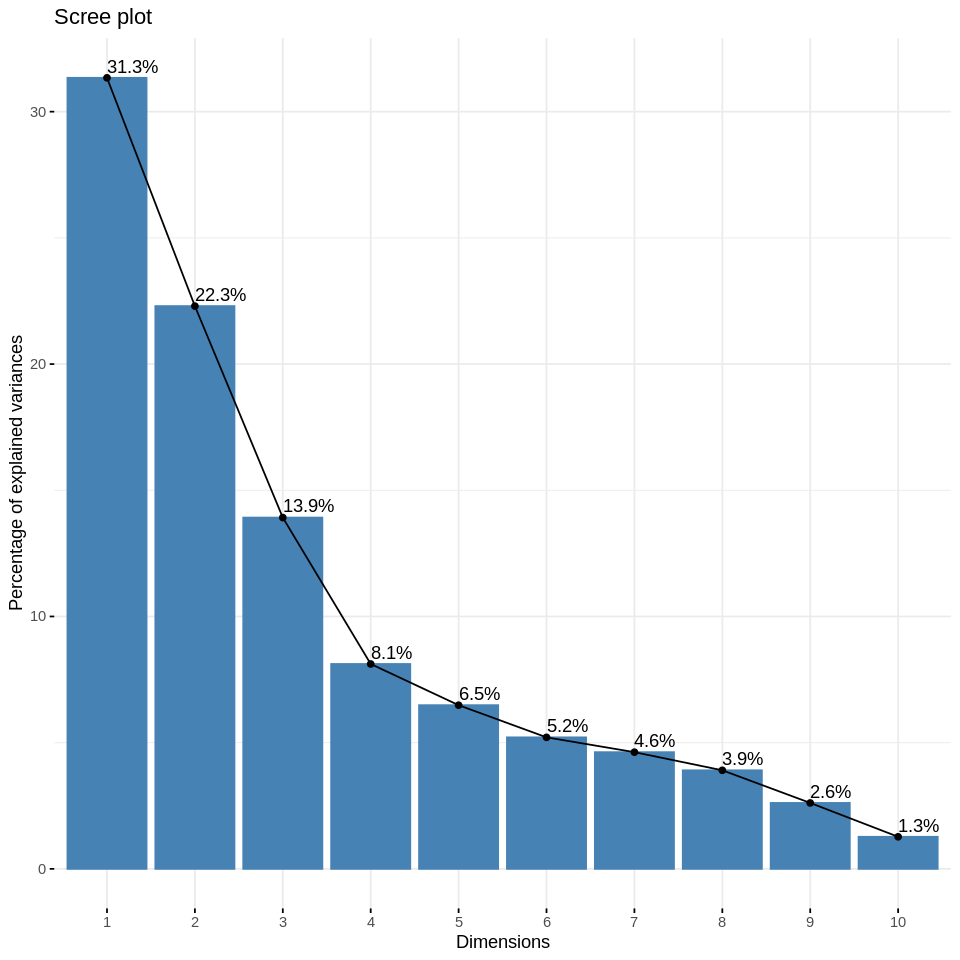

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
fviz_screeplot(pca_total, addlabels = TRUE) 

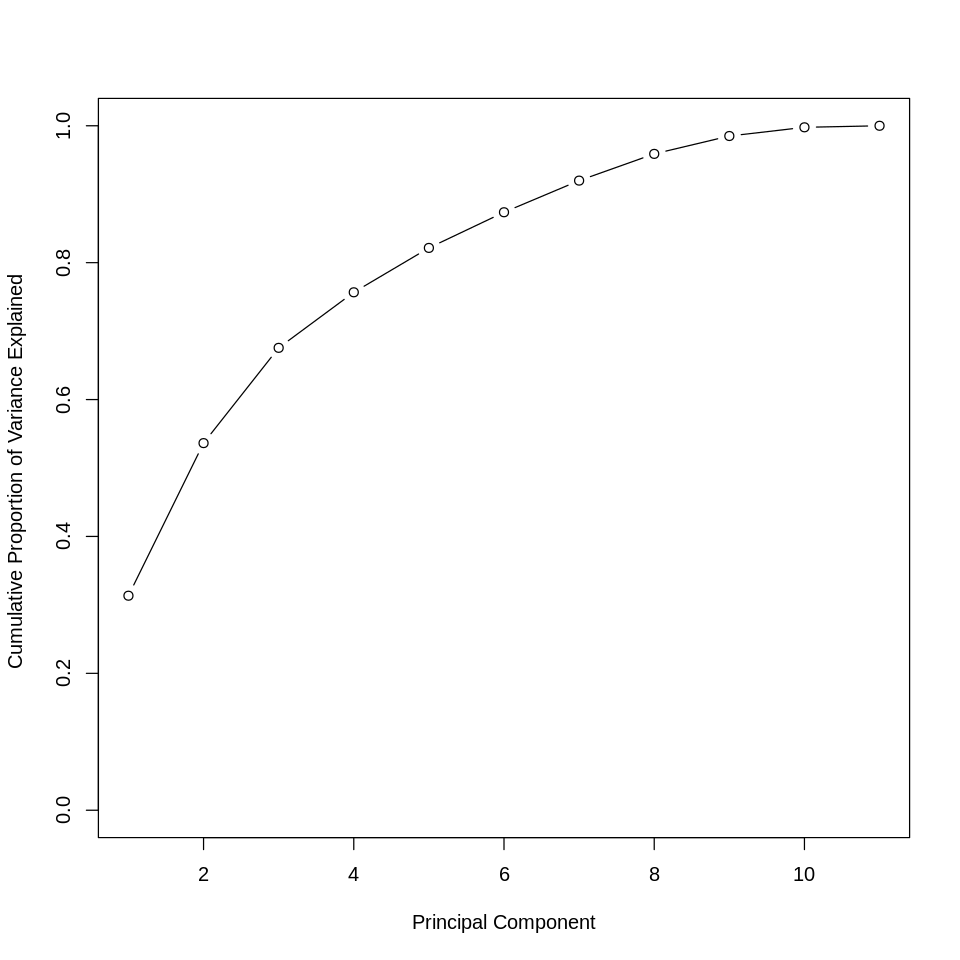

In [16]:
plot(cumsum(pca_total$sdev^2/sum(pca_total$sdev^2)), xlab="Principal Component",
     ylab="Cumulative Proportion of Variance Explained ", ylim=c(0,1) ,type='b') # SOLUTION

In [17]:
pca_df<- data.frame(scores[,1:7])
pca_df$quality<- wine_data_scaled$quality
head(pca_df)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3.579228,-0.6846039,-2.560527,0.7027013,0.2237058,0.5443355,0.3609636,low
2,3.868953,-0.1346086,-1.742847,1.3806990,-0.7910041,-1.3282559,0.2708500,low
3,3.618911,-0.2204150,-1.542923,1.0750850,-0.4869032,-0.7098188,0.3512363,low
4,2.478325,1.6614434,2.591938,0.4326000,0.7479197,1.4273349,0.4382138,high
5,3.579228,-0.6846039,-2.560527,0.7027013,0.2237058,0.5443355,0.3609636,low
6,3.438679,-0.6622402,-2.508505,0.6013376,0.2234648,0.6025866,0.4588425,low


## Model Building

### Split Data into Train and Test

In [18]:
set.seed(0)

#use 80% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(wine_data_scaled), replace=TRUE, prob=c(0.8,0.2))
train  <- wine_data_scaled[sample, ]
test   <- wine_data_scaled[!sample, ]

dim(train)
dim(test)

# for splitting with PCA
# sample <- sample(c(TRUE, FALSE), nrow(pca_df), replace=TRUE, prob=c(0.8,0.2))
# train  <- pca_df[sample, ]
# test   <- pca_df[!sample, ]

# dim(train)
# dim(test)


[1] 5142   12

[1] 1355   12

In [19]:
tr<- trainControl(method = "repeatedcv", number = 10, repeats = 3)

## Model 1: Logistic Regression

In [20]:
set.seed(0)
glmModel <- train(factor(quality)~., data=train, method="glm",
                  family="binomial", trControl=tr)
glmModel

Generalized Linear Model 

5142 samples
  11 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4628, 4627, 4628, 4628, 4628, 4628, ... 
Resampling results:

  Accuracy   Kappa    
  0.7422528  0.4272042


In [95]:
set.seed(0)
pred_lr <-predict(glmModel, newdata = test)
cm_lr <- confusionMatrix(pred_lr,factor(test$quality))
#cm_lr

acc_lr <- cm_lr$overall['Accuracy']
acc_lr
spec_lr <-cm_lr$byClass['Specificity']
spec_lr
sen_lr <-cm_lr$byClass['Sensitivity']
sen_lr
prec_lr <- cm_lr$byClass['Precision']
prec_lr

Accuracy 
0.7446494

Specificity 
  0.8461538

Sensitivity 
  0.5619835

Precision 
0.6699507

## Model 2: K - Nearest Neighbours

In [22]:
set.seed(0)
tunegrid_knn <- data.frame(k = seq(5,30,by=2))
knnModel <- train(quality ~., data = train, method = "knn",
                 trControl= tr,
                 tuneGrid = tunegrid_knn)
knnModel

k-Nearest Neighbors 

5142 samples
  11 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4628, 4627, 4628, 4628, 4628, 4628, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7491233  0.4521398
   7  0.7475039  0.4469926
   9  0.7487986  0.4486609
  11  0.7490591  0.4482725
  13  0.7483467  0.4461985
  15  0.7477643  0.4454817
  17  0.7473717  0.4436597
  19  0.7467878  0.4412359
  21  0.7467897  0.4402971
  23  0.7489294  0.4451174
  25  0.7474385  0.4406460
  27  0.7445848  0.4338469
  29  0.7438720  0.4319026

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

In [108]:
set.seed(0)
pred_knn <-predict(knnModel, newdata = test)
cm_knn <- confusionMatrix(pred_knn,factor(test$quality))
#cm_knn

acc_knn<-cm_knn$overall['Accuracy']
acc_knn
spec_knn<-cm_knn$byClass['Specificity']
spec_knn
sen_knn<-cm_knn$byClass['Sensitivity']
sen_knn
prec_knn <- cm_knn$byClass['Precision']
prec_knn

Accuracy 
0.7527675

Specificity 
  0.8277842

Sensitivity 
  0.6177686

Precision 
0.6659243

## Model 3: Random Forest

In [24]:
tunegrid_rf <- expand.grid(mtry = seq(1,11,by=1))
set.seed(0)

rfModel<- train(quality~. ,
                 data = train,
                 method = "rf", 
                 trControl = tr,
                 tuneGrid = tunegrid_rf)
rfModel

Random Forest 

5142 samples
  11 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4628, 4627, 4628, 4628, 4628, 4628, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.8040297  0.5581576
   2    0.8232182  0.6131990
   3    0.8232822  0.6141591
   4    0.8225045  0.6125807
   5    0.8217913  0.6113995
   6    0.8206255  0.6091301
   7    0.8204941  0.6094772
   8    0.8193281  0.6069974
   9    0.8187464  0.6058447
  10    0.8187444  0.6061473
  11    0.8173828  0.6029822

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

In [107]:
set.seed(0)
pred_rf<-predict(rfModel, newdata = test)
cm_rf<- confusionMatrix(pred_rf,factor(test$quality))
#cm_rf

acc_rf<-cm_rf$overall['Accuracy']
acc_rf
spec_rf<-cm_rf$byClass['Specificity']
spec_rf
sen_rf<-cm_rf$byClass['Sensitivity']
sen_rf
prec_rf <- cm_rf$byClass['Precision']
prec_rf

Accuracy 
0.8236162

Specificity 
  0.8966705

Sensitivity 
  0.6921488

Precision 
0.7882353

## Model 4: SVM

In [26]:
# basic linear code
set.seed(0)
svm_mod <- svm(quality~., data = train, kernel="linear", scale=FALSE, cost = 5)
svm_mod


Call:
svm(formula = quality ~ ., data = train, kernel = "linear", cost = 5, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  5 

Number of Support Vectors:  3043


In [27]:
set.seed(0)
svm_mod_tune <- tune(svm, quality~., data=train, 
                     ranges=list(
                         kernel=c("linear","radial"),
                     cost = c(0.1,1,10),
                     gamma = c(0.5, 1, 2)))
svm_mod_tune


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 kernel cost gamma
 radial    1     1

- best performance: 0.2170451 


In [28]:
set.seed(0)
svmTunedModel <- svm(quality~., data = train, kernel="radial", cost = 1, gamma = 1)
svmTunedModel  


Call:
svm(formula = quality ~ ., data = train, kernel = "radial", cost = 1, 
    gamma = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  3771


In [106]:
set.seed(0)
pred_svm <- predict(svmTunedModel, test)

cm_svm <- confusionMatrix(pred_svm, test$quality)
#cm_svm
acc_svm<- cm_svm$overall['Accuracy']
acc_svm
spec_svm<- cm_svm$byClass['Specificity']
spec_svm
sen_svm<- cm_svm$byClass['Sensitivity']
sen_svm
prec_svm <- cm_svm$byClass['Precision']
prec_svm

Accuracy 
0.7800738

Specificity 
  0.8771527

Sensitivity 
  0.6053719

Precision 
   0.7325

## ROC Curve

In [34]:
test$qualityH <- ifelse(test$quality == "high", 1, 0)
num_pred_lr<- ifelse(pred_lr =="high",1,0)
num_pred_knn<- ifelse(pred_knn =="high",1,0)
num_pred_rf<- ifelse(pred_rf =="high",1,0)
num_pred_svm<- ifelse(pred_svm =="high",1,0)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



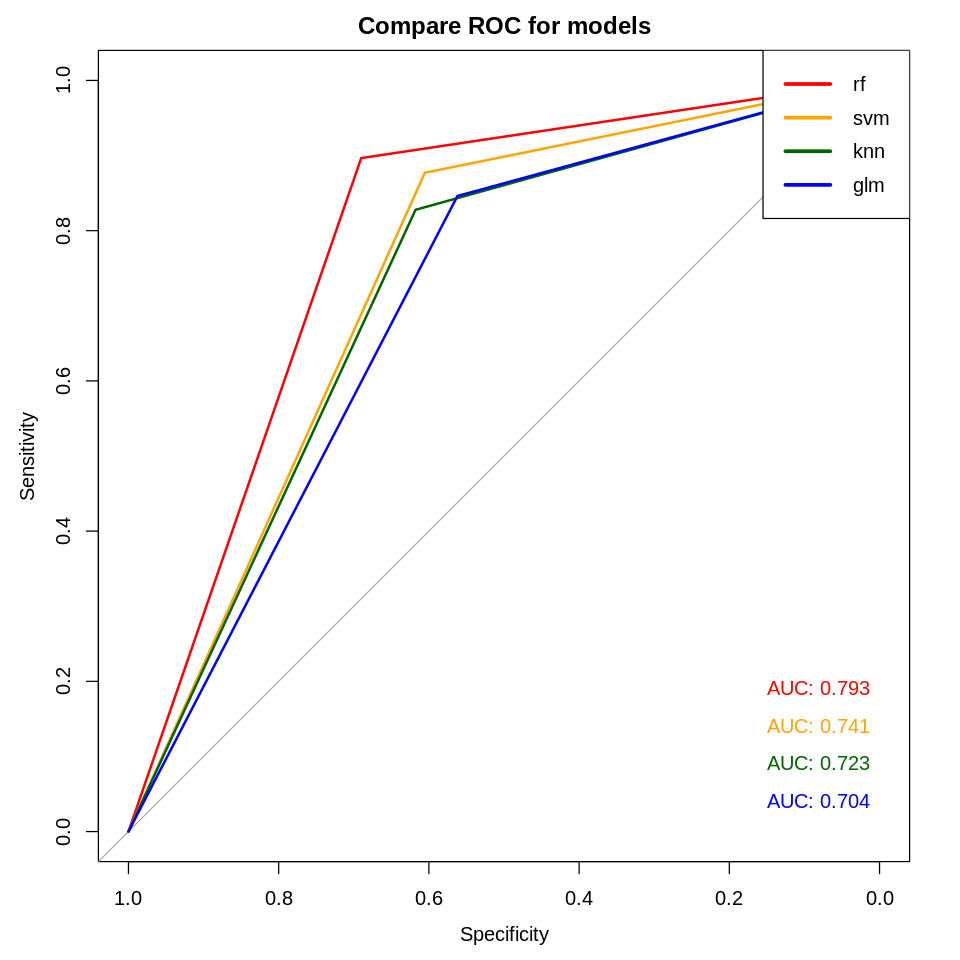

In [37]:
roc_glm <- roc(test$qualityH,num_pred_lr)
roc_knn <- roc(test$qualityH,num_pred_knn)
roc_rf <- roc(test$qualityH,num_pred_rf)
roc_svm <- roc(test$qualityH,num_pred_svm)

plot(roc_rf, col="red", print.auc=TRUE, print.auc.x =0.15, print.auc.y=0.20,main="Compare ROC for models")
plot(roc_svm, add=TRUE, col="orange", print.auc=TRUE, print.auc.x =0.15, print.auc.y=0.15)
plot(roc_knn, add=TRUE, col="dark green", print.auc=TRUE, print.auc.x =0.15, print.auc.y=0.10)
plot(roc_glm, add=TRUE,col="blue", print.auc=TRUE, print.auc.x =0.15, print.auc.y=0.05, )
legend("topright",legend = c("rf", "svm","knn","glm"),lty = c(1,1), col = c("red", "orange","dark green","blue"), lwd = 3)

## Calculating Metric

In [39]:
dummyVars<-contrasts(train$quality)
dummyVars

,high
low,0
high,1


In [115]:
cf_metrics <- function(preds){
    tp <- sum(preds==test$quality & preds=="high")
    tn <- sum(preds==test$quality & preds=="low")
    fp <- sum(preds!=test$quality & preds=="high")
    fn <- sum(preds!=test$quality & preds=="low")
    FPR <- fp/(fp+tn)
    FNR <- fn/(tp+fn)
    list<- list("FPR" = FPR, "FNR" = FNR)
    return (list)
    }

# lr
lr_values<-cf_metrics(pred_lr)
lr_FPR<-lr_values$FPR
lr_FNR<-lr_values$FNR

# knn
knn_values<-cf_metrics(pred_knn)
knn_FPR<-knn_values$FPR
knn_FNR<-knn_values$FNR

# rf
rf_values<-cf_metrics(pred_rf)
rf_FPR<-rf_values$FPR
rf_FNR<-rf_values$FNR

#svm
svm_values<-cf_metrics(pred_svm)
svm_FPR<-svm_values$FPR
svm_FNR<-svm_values$FNR

## Table for the Metrics

In [117]:
model_names <- c("Logistic Regression", "K Nearest Neighbours", "Random Forest", "Support Vector Machine")
acc_values <- c(acc_lr, acc_knn, acc_rf, acc_svm)
spec_values <- c(spec_lr, spec_knn, spec_rf, spec_svm)
sen_values <- c(sen_lr, sen_knn, sen_rf, sen_svm)
prec_values <- c(prec_lr, prec_knn, prec_rf, prec_svm)
FPR_values <- c(lr_FPR, knn_FPR, rf_FPR, svm_FPR)
FNR_values <- c(lr_FNR, knn_FNR, rf_FNR, svm_FNR)

comp_table <- data.frame(model_names, acc_values, spec_values, sen_values, prec_values, FPR_values, FNR_values)
names(comp_table) <- c('Model', 'Accuracy', 'Specificity', 'Sensitivity', 'Precision', 'FPR', 'FNR')
comp_table

Model,Accuracy,Specificity,Sensitivity,Precision,FPR,FNR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Logistic Regression,0.7446494,0.8461538,0.5619835,0.6699507,0.4380165,0.1538462
K Nearest Neighbours,0.7527675,0.8277842,0.6177686,0.6659243,0.3822314,0.1722158
Random Forest,0.8236162,0.8966705,0.6921488,0.7882353,0.3078512,0.1033295
Support Vector Machine,0.7800738,0.8771527,0.6053719,0.7325000,0.3946281,0.1228473


## Looking at best model

In [130]:
finalRF<- randomForest(quality~.,data = train, mtry = 3)

,MeanDecreaseGini
fixAcid,170.65760
volAcid,302.92734
citAcid,205.79407
resSugar,199.84958
chlor,216.78982
totSO2,222.11138
density,278.79584
pH,190.41751
sulphate,196.65870
alcohol,399.66451


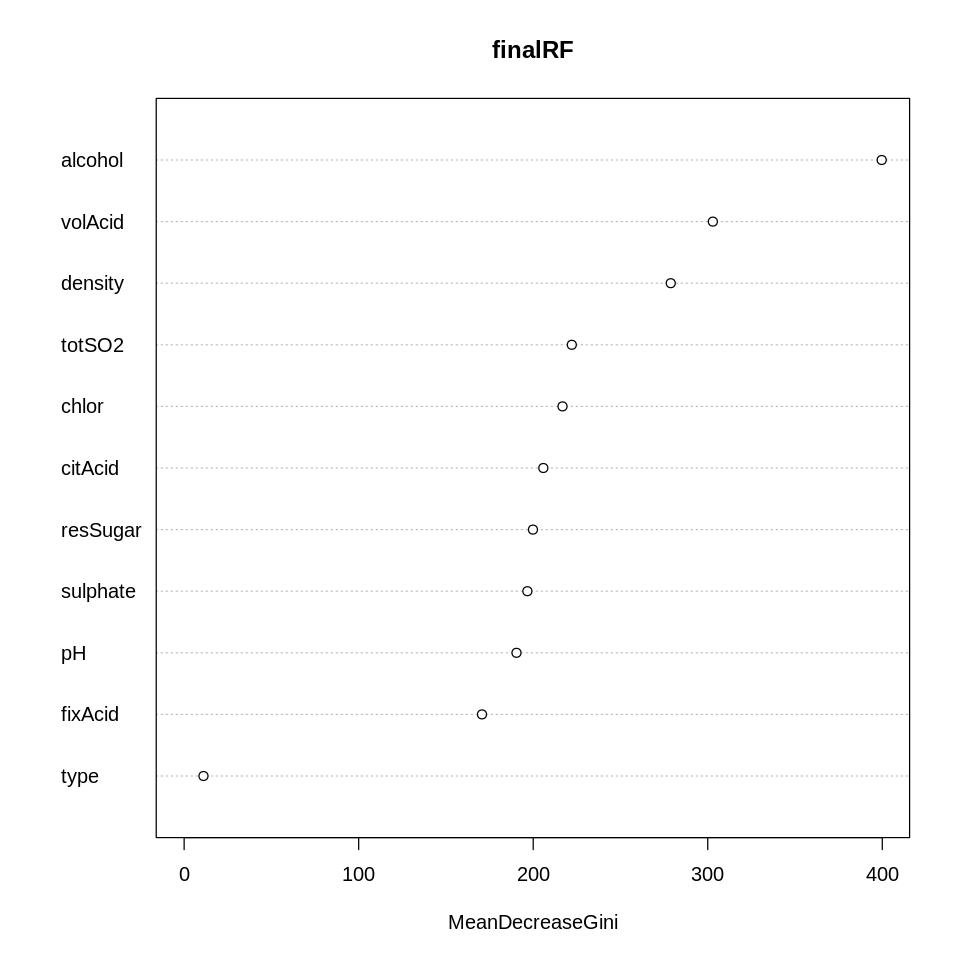

In [157]:
# Exploring the best model in more detail
importance(finalRF)
varImpPlot(finalRF)